In [22]:
import pandas as pd
import numpy as np
import re
import cleaning_functions as cfun
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
#importing three dataset : 
# - one giving a worldwide overview on cyber attacks and their targets (clean dataset)
# - one giving the countries readiness to such attacks (some Nans)
# - our main dataset giving detailed informations on Ransomware

df_global_attacks = pd.read_csv('..\data\cleaned\global_threats.csv')
df_country_index = pd.read_csv('..\data\cleaned\country_index.csv')
df_ransomware = pd.read_csv('..\data\cleaned\clean_dataset.csv')

In [6]:
# in this section we will 
# 1/ Try to understand the volume, and dispersion of attacks in the world
# 2/ Zoom in on the type of attacks used by hackers and their progression over time
# 3/ focus our attention on Ransomware and which countries are the most impacted by the phenomena 

In [24]:
df_global_attacks.head()

,continent,country,month,year,type,category_id
0,Asia,China,September,2003,Malware,5
1,North America,US,March,2005,DDoS,2
2,North America,US,April,2005,APT,0
3,North America,US,May,2006,Phishing,7
4,North America,US,August,2006,Malware,5


In [25]:
# Most attacked region
most_attacked_region = df_global_attacks['continent'].value_counts().idxmax()

# Most attacked country
most_attacked_country = df_global_attacks['country'].value_counts().idxmax()

# Top 3 types of attacks and their volumes
top_attacks = df_global_attacks['type'].value_counts().head(3)

print('The most attacked region is',most_attacked_region)
print('The most attacked country is',most_attacked_country)
print('The top 3 types of attacks are',top_attacks)


The most attacked region is Asia
The most attacked country is US
The top 3 types of attacks are type
Phishing    285
Malware     211
APT         154
Name: count, dtype: int64


In [26]:
df_global_attacks['type'].value_counts()

type
Phishing             285
Malware              211
APT                  154
DDoS                  61
espionage             49
DoS                   46
Espionage             43
Zero-Day Exploit      39
Man-in-the-Middle     27
SQL Injection         17
SQL injection         13
Brute Force            2
Name: count, dtype: int64

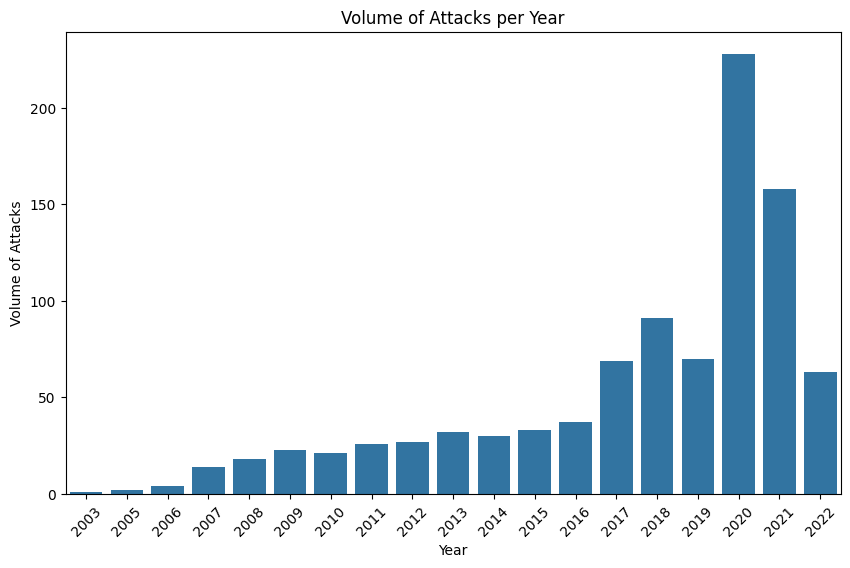

In [40]:
# Seaborn bar plot per year of the volume of attacks

attacks_per_year = df_global_attacks['year'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=attacks_per_year.index, y=attacks_per_year.values)
plt.title('Volume of Attacks per Year')
plt.ylabel('Volume of Attacks')
plt.xlabel('Year')
plt.xticks(rotation=45)

plt.show()


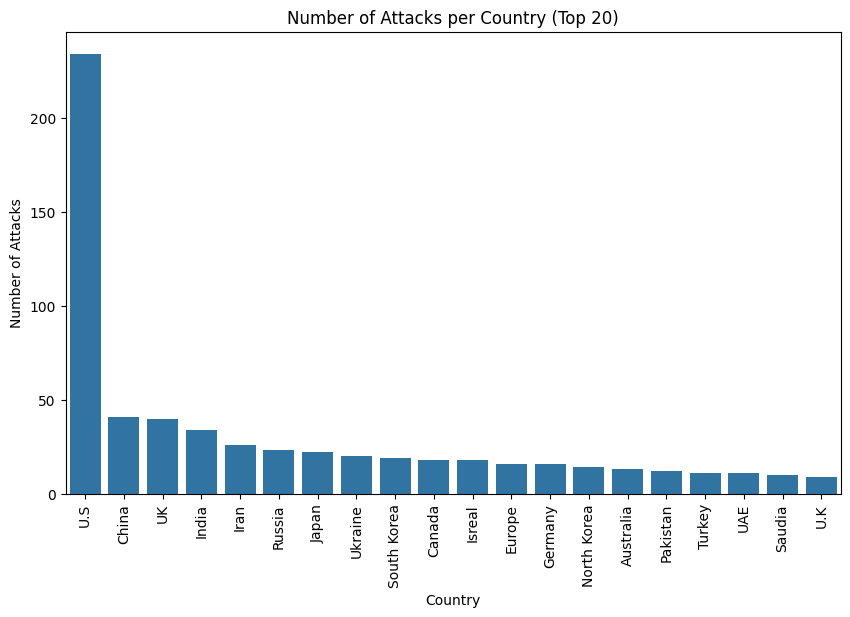

In [37]:
# Top 20 countries and their volume of attacks

#to tackle uncleaned country name
df_global_attacks['country'] = df_global_attacks['country'].replace('US', 'U.S')

#fetching top 20 countries in terms of volumes of attacks
top_20_countries = df_global_attacks['country'].value_counts().head(20)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_20_countries.index, y=top_20_countries.values)
plt.title('Number of Attacks per Country (Top 20)')
plt.ylabel('Number of Attacks')
plt.xlabel('Country')
plt.xticks(rotation=90)
plt.show()


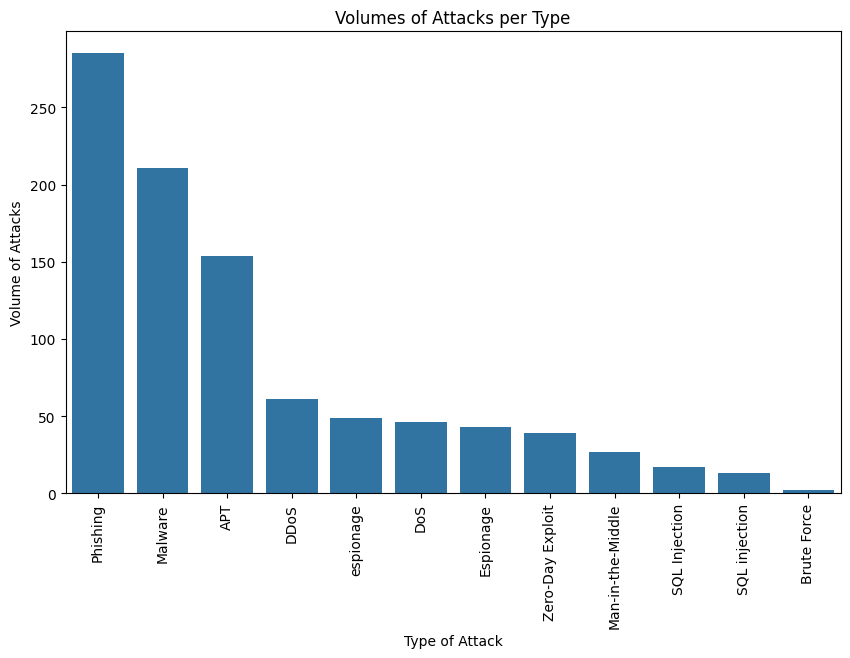

In [38]:
# Seaborn bar plot showing the volumes of attacks per type

plt.figure(figsize=(10, 6))

type_counts = df_global_attacks['type'].value_counts()
sns.barplot(x=type_counts.index, y=type_counts.values)
plt.title('Volumes of Attacks per Type')
plt.ylabel('Volume of Attacks')
plt.xlabel('Type of Attack')
plt.xticks(rotation=90)

plt.show()


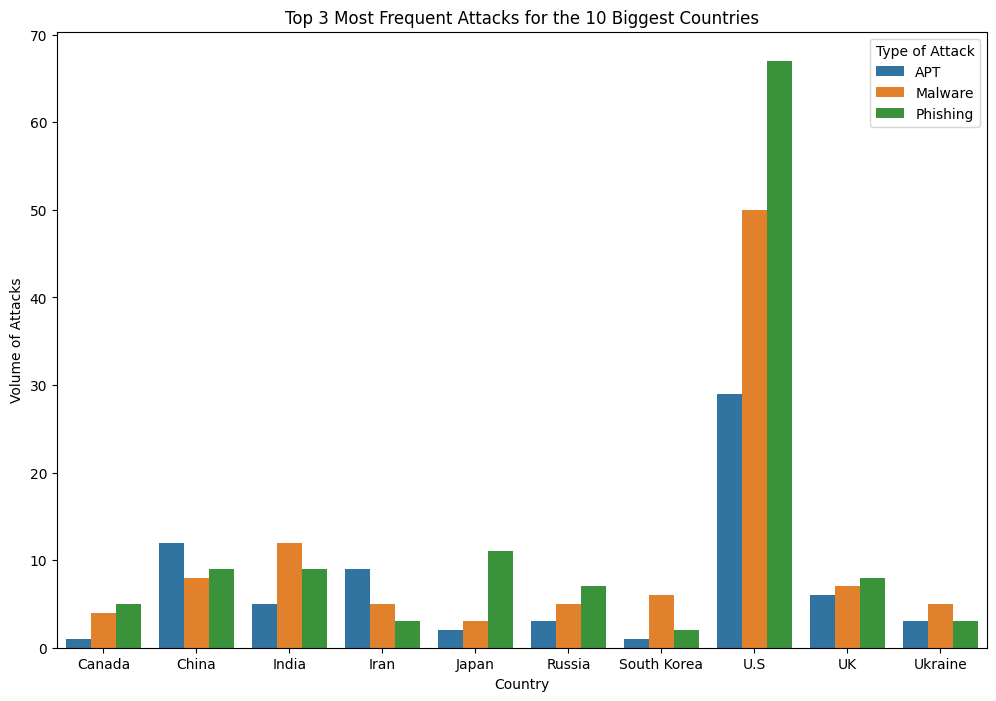

In [39]:
# graph of the 3 most frquent attackes for the 10 biggest countries

# Get the 10 countries with the most attacks
top_countries = df_global_attacks['country'].value_counts().nlargest(10).index

# Filter the DataFrame to only include rows with the top 10 countries
df_top_countries = df_global_attacks[df_global_attacks['country'].isin(top_countries)]

# Get the three most frequent types of attacks
top_attack_types = df_global_attacks['type'].value_counts().nlargest(3).index

# Filter the DataFrame to only include rows with the top 3 types of attacks
df_top_attacks = df_top_countries[df_top_countries['type'].isin(top_attack_types)]

# Count the number of each type of attack in the top countries
attack_counts = df_top_attacks.groupby(['country', 'type']).size().reset_index(name='count')

# Pivot the DataFrame to get countries on the x-axis and attack types as different bars
attack_counts_pivot = attack_counts.pivot(index='type', columns='country', values='count')

# Plot using Seaborn
plt.figure(figsize=(12, 8))

sns.barplot(data=attack_counts, x='country', y='count', hue='type')
plt.title('Top 3 Most Frequent Attacks for the 10 Biggest Countries')
plt.ylabel('Volume of Attacks')
plt.xlabel('Country')
plt.legend(title='Type of Attack')
plt.show()

In [ ]:
# Observations :
    
#     We can now say that the USA is one of the most targeted country in terms of cyber attacks, with China & the UK as seconddary targets, 
#     It seems that the period post covid has seen the explosion of the number of attacks (2020/2021)
#     And that Phishing and Malware are the main threats to private and public actors at the moment 
#     Phishing and Malware are the main entry doors to Ransomwares attacks, which we will analyse in more details below

In [41]:
# We will now analyse the level of prepardness to attacks of our top threatened countries (US, China, UK) using the Dataset "Cyber Security Indexes"

# For context :

#     The Dataset "Cyber Security Indexes" includes four indicators which illustrate the current cyber security situation around the world. The data is provided on 193 countries and territories, grouped by five geographical regions - Africa, North America, South America, Europe and Asia-Pasific.

#         The Cybersecurity Exposure Index (CEI) defines the level of exposure to cybercrime by country from 0 to 1; the higher the score, the higher the exposure (provided by 10guard). The indicator was last updated in 2020.
#         The Global Cyber Security Index (GCI) is a trusted reference that measures the commitment of countries to cybersecurity at a global level – to raise awareness of the importance and different dimensions of the issue (provided by the International Telecommunication Union - ITU). The indicator was last updated in 2021.
#         The National Cyber Security Index (NCSI) measures a country's readiness to address cyber threats and manage cyber incidents. It is composed of categories, capacities, and indicators (provided by NCSI). The indicator was last updated in January 2023.
#         The Digital Development Level (DDL) defines the average percentage the country received from the maximum value of both indices (provided by NCSI). The indicator was last updated in January 2023.

# we will focus on exposure (CEI) and readiness (NCSI) in this short analysis

df_country_index.head()

,Country,Region,CEI,GCI,NCSI,DDL
0,Afghanistan,Asia-Pasific,1.000,5.20,11.69,19.50
1,Albania,Europe,0.566,64.32,62.34,48.74
2,Algeria,Africa,0.721,33.95,33.77,42.81
3,Andorra,Europe,NaN,26.38,NaN,NaN
4,Angola,Africa,NaN,12.99,9.09,22.69


C:\Users\antho\AppData\Local\Temp\ipykernel_31088\132783468.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Country', y='CEI', data=top_10_cei, palette="Blues_d")


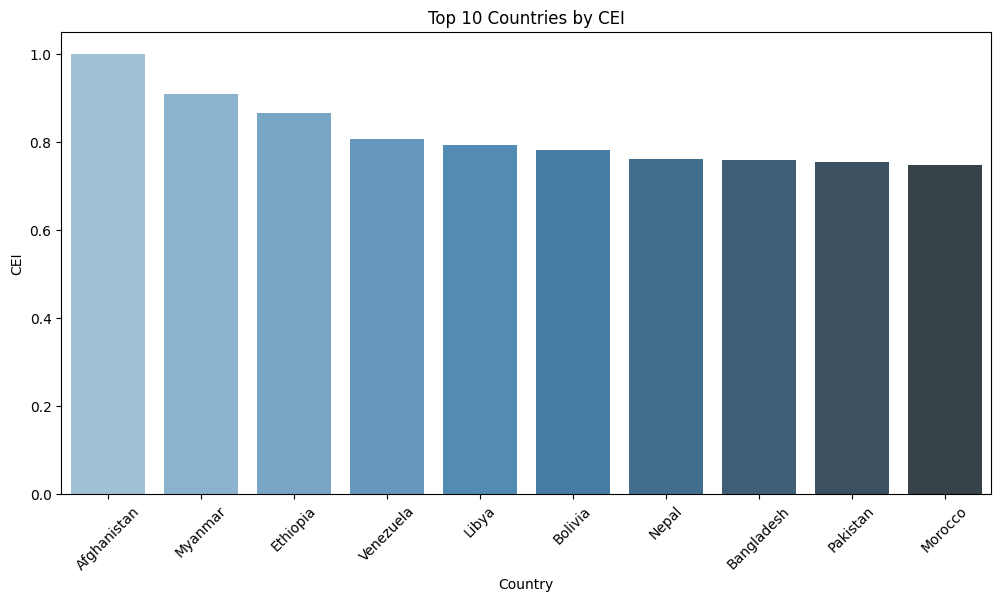

C:\Users\antho\AppData\Local\Temp\ipykernel_31088\132783468.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Country', y='NCSI', data=top_10_ncsi, palette="Greens_d")


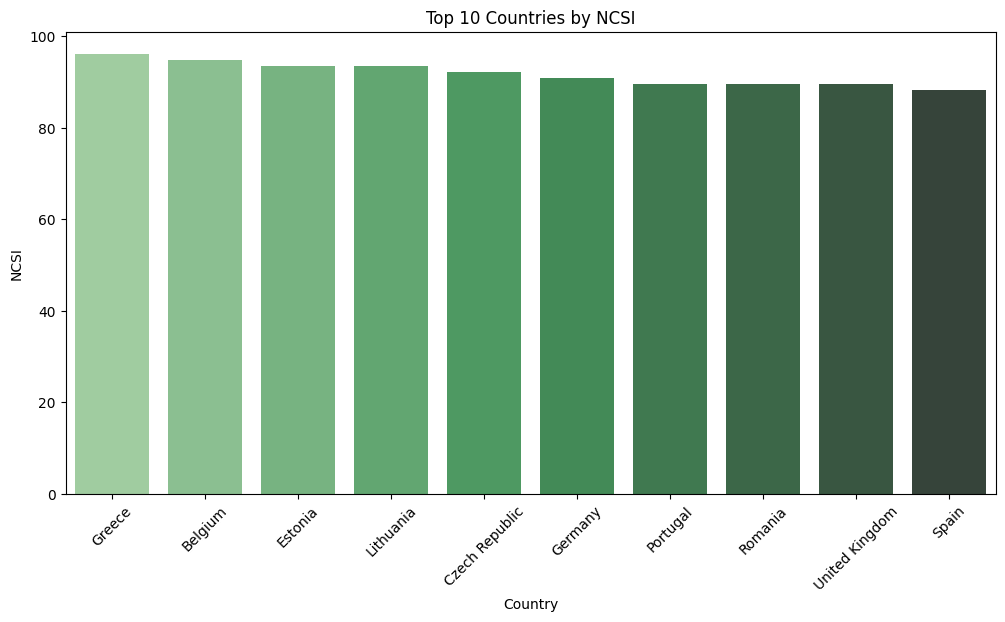

In [42]:
# Drop rows with NaN values in 'CEI' and 'NCSI' for accurate top 10 lists
df_country_index_cleaned = df_country_index.dropna(subset=['CEI', 'NCSI'])

# Get top 10 countries for Cybersecurity Exposure Index (CEI)
top_10_cei = df_country_index_cleaned.nlargest(10, 'CEI')

# Get top 10 countries for National Cyber Security Index (NCSI)
top_10_ncsi = df_country_index_cleaned.nlargest(10, 'NCSI')



# Barplot for top 10 countries for Cybersecurity Exposure Index (CEI)
plt.figure(figsize=(12, 6))
sns.barplot(x='Country', y='CEI', data=top_10_cei, palette="Blues_d")
plt.title('Top 10 Countries by CEI')
plt.xticks(rotation=45)
plt.show()

# Barplottop 10 countries for National Cyber Security Index (NCSI)
plt.figure(figsize=(12, 6))
sns.barplot(x='Country', y='NCSI', data=top_10_ncsi, palette="Greens_d")
plt.title('Top 10 Countries by NCSI')
plt.xticks(rotation=45)
plt.show()

In [43]:
#Observations :

# As seen above, small countries with unstable governments are more prone to external attacks, 
# and do not seem prepared for such cases. In the second graph we can see that European countries are in 
# general more prepared for cyber attacks, with the example of Estonia being regularly attacked by its neighbour 'Russia), 
# Belgium as the center of the UE also has cemented its cyber-surface,
# and Greece on top of the game also facing rivalry with Turkey

In [ ]:
# We will now analyse the volume and countries most impacted by ransomware

In [44]:
df_ransomware.head()

,target,sector,organisation_size,revenue,ransom_cost,ransom_paid,year,month,location,ransomware
0,cryptolocker,misc,large,1000000.0,27000000.0,unknown,2013,sep,worldwide,cryptolocker
1,cryptowall,misc,medium,1000000.0,18000000.0,unknown,2014,jan,worldwide,cryptowall
2,apple_devices,misc,small,1000000.0,5000000.0,unknown,2014,may,australia,not_revealed
3,new_hampshire_pd,government,small,1000000.0,3000.0,unknown,2014,jun,usa,cryptowall
4,teslacrypt,misc,small,1000000.0,76520.0,unknown,2015,mar,worldwide,teslacrypt


C:\Users\antho\AppData\Local\Temp\ipykernel_31088\512273810.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_locations.index, y=top_locations.values, palette="coolwarm")


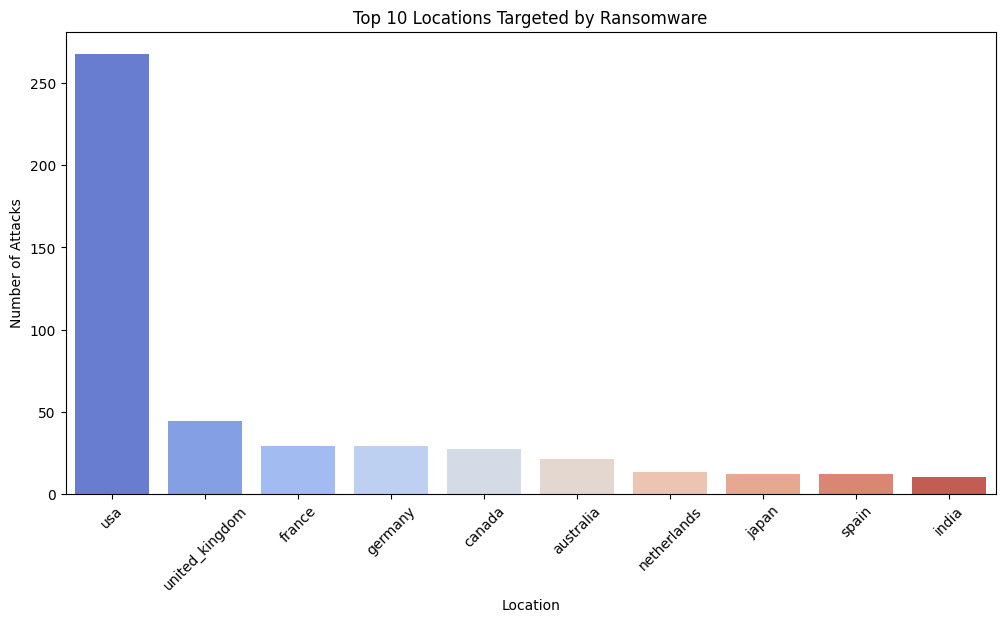

In [46]:
# Barplot of the top 10 locations targeted by ransomware
top_locations = df_ransomware['location'].value_counts().nlargest(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_locations.index, y=top_locations.values, palette="coolwarm")
plt.title('Top 10 Locations Targeted by Ransomware')
plt.ylabel('Number of Attacks')
plt.xlabel('Location')
plt.xticks(rotation=45)
plt.show()


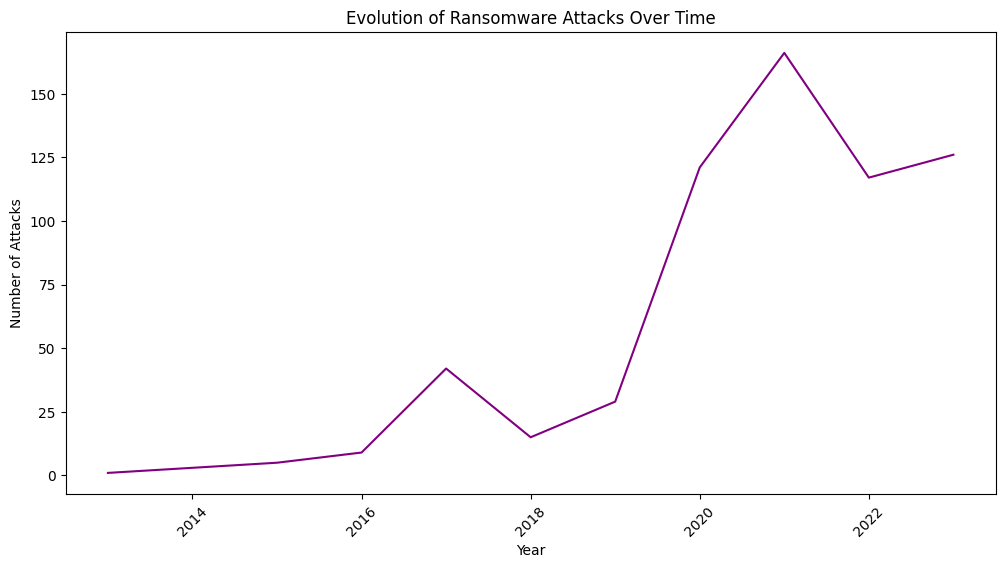

In [48]:
# Graph of the evolution of attacks over time (by year)


# Count the number of attacks by year
attacks_over_time = df_ransomware.groupby('year').size()

# Plot the evolution of attacks over time
plt.figure(figsize=(12, 6))
attacks_over_time.plot(kind='line', color='purple')
plt.title('Evolution of Ransomware Attacks Over Time')
plt.ylabel('Number of Attacks')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Observations :
    
#     As expected, the USA and UK are palced in the first rows of attacks by ransomware, 
#     following the more global trend of cyber security attacks we've seen above. 
#     Surprisingly, China is under-represented here, maybee to the lack of formal communication from the 
#     authorities and companies of the volumes of attacks and their severity.
    
#     In synchronisation with the global volume of attacks worldwide, 
#     Ransomware attacks seems to follow the same pattern with an explosion of the number of attacks post-COVID.